In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10 as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import BatchNormalization, Dropout
import seaborn as sns;

In [2]:
import pandas as pd
#immport data
data_frame = pd.read_excel("train_processed.xlsx")
data_frame1 = pd.read_excel("data_anysis.xlsx")
data_frame.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,-2.620272,-2.849565,-3.547868,-0.984604,0.024193,-5.305197,3.300447,-0.364524,3.786543,-1.395746,-1.225267,-0.387907,0.004648,-1.807863,0.429098
std,0.014543,0.013843,0.008447,0.000192,1.054608,0.018987,0.673344,0.614209,0.457693,0.000110,0.000113,0.201416,0.953273,0.331819,0.495012
min,-2.651326,-2.882784,-3.577383,-0.984806,-1.000782,-5.342180,3.000000,-1.076193,-0.072659,-1.395901,-1.225406,-0.494159,-4.469358,-1.955921,0.000000
25%,-2.630685,-2.858999,-3.552881,-0.984732,-0.866802,-5.322004,3.000000,-0.708705,3.525731,-1.395843,-1.225370,-0.494159,-0.321245,-1.955921,0.000000
50%,-2.620425,-2.848114,-3.547182,-0.984670,-0.350019,-5.303272,3.000000,-0.526822,3.751017,-1.395763,-1.225286,-0.494159,0.407399,-1.955921,0.000000
75%,-2.609117,-2.838736,-3.542608,-0.984539,0.691202,-5.289773,3.000000,-0.134930,4.017546,-1.395664,-1.225187,-0.145699,0.682794,-1.955921,1.000000
max,-2.583622,-2.819068,-3.508293,-0.983707,3.402716,-5.271529,6.000000,10.810466,8.133688,-1.395374,-1.224878,1.248144,0.754607,-0.477541,1.000000


In [3]:
import pandas as pd
y_data = data_frame['Underclocking'].to_numpy()
feature_ex = ['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
#feature_ex=['手機螢幕溫度(平均)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','手機外殼/包膜指標','通話頻率指標','新機/二手/老舊','CPU效能等級']
x_data = data_frame[feature_ex].to_numpy()


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized
def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 
x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 
print(x_data) 
print(y_data) 

[[ 1.36300652 -0.61562149 -0.80150167 ...  2.1330885   2.23749711
   0.78243834]
 [ 0.92099655  0.43536847  2.19351346 ... -0.41610788 -0.41100958
   0.49842579]
 [-0.56981449 -1.07962976  0.01747584 ...  0.11219075  0.03672694
   0.78682338]
 ...
 [-1.36665061 -0.72751934  0.16482193 ... -1.3547237  -1.2284996
   0.1461305 ]
 [ 0.10900786  0.42781419  0.39875095 ...  0.62857951  0.63988476
  -0.78380936]
 [ 1.30898308  0.16152563 -0.86666265 ...  1.44250353  1.55050655
   0.32371546]]
[0 1 0 ... 0 0 0]
[[ 1.36300652 -0.61562149 -0.80150167 ...  2.1330885   2.23749711
   0.78243834]
 [ 0.92099655  0.43536847  2.19351346 ... -0.41610788 -0.41100958
   0.49842579]
 [-0.56981449 -1.07962976  0.01747584 ...  0.11219075  0.03672694
   0.78682338]
 ...
 [-1.36665061 -0.72751934  0.16482193 ... -1.3547237  -1.2284996
   0.1461305 ]
 [ 0.10900786  0.42781419  0.39875095 ...  0.62857951  0.63988476
  -0.78380936]
 [ 1.30898308  0.16152563 -0.86666265 ...  1.44250353  1.55050655
   0.32371546]]


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from collections import Counter
from imblearn.under_sampling import TomekLinks
print('Original dataset shape %s' % Counter(y_data))
tl = TomekLinks()
x_data, y_data = tl.fit_resample(x_data, y_data)
print('Resampled dataset shape %s' % Counter(y_data))


Original dataset shape Counter({0: 2170, 1: 1631})
Resampled dataset shape Counter({0: 1822, 1: 1631})


In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from collections import Counter
from imblearn.under_sampling import TomekLinks
print('Original dataset shape %s' % Counter(y_data))
tl = TomekLinks()
x_data, y_data = tl.fit_resample(x_data, y_data)
print('Resampled dataset shape %s' % Counter(y_data))

Original dataset shape Counter({0: 1822, 1: 1631})
Resampled dataset shape Counter({0: 1733, 1: 1631})


In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
x_data_pca=pca.fit(x_data).transform(x_data)
x_data=x_data_pca

In [8]:
pca.explained_variance_ratio_

array([0.36850379, 0.17994125, 0.13268066, 0.12396532, 0.10281803,
       0.05684218])

In [9]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36850379, 0.54844503, 0.6811257 , 0.80509102, 0.90790905,
       0.96475123])

In [65]:
from sklearn.model_selection import train_test_split
# 使用 train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

print("Xtrain shape:", Xtrain.shape)
print("Xtrain type:", type(Xtrain))
print("Xtest shape:", Xtest.shape)
print("Xtest type:", type(Xtest))
print("ytrain shape:", ytrain.shape)
print("ytrain type:", type(ytrain))
print("ytest shape:", ytest.shape)
print("ytest type:", type(ytest))

Xtrain shape: (2859, 6)
Xtrain type: <class 'numpy.ndarray'>
Xtest shape: (505, 6)
Xtest type: <class 'numpy.ndarray'>
ytrain shape: (2859,)
ytrain type: <class 'numpy.ndarray'>
ytest shape: (505,)
ytest type: <class 'numpy.ndarray'>


In [94]:

import tensorflow as tf
l2_regularizer = tf.keras.regularizers.l2(0.01)
input_features = x_data.shape[1]
print( x_data.shape[1])
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_features,)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(16, activation='tanh', kernel_regularizer=l2_regularizer),
    tf.keras.layers.Dense(8, activation='tanh', kernel_regularizer=l2_regularizer),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(4, activation='tanh', kernel_regularizer=l2_regularizer),
    tf.keras.layers.Dense(2, activation='tanh', kernel_regularizer=l2_regularizer),
    tf.keras.layers.Dense(1, activation='sigmoid'),    
])
model.summary()



6


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_215 (Dense)               │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,945 (46.66 KB)

 Trainable params: 11,945 (46.66 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
import tensorflow as tf

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1).numpy())
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#from keras.callbacks import EarlyStopping


history = model.fit(Xtrain, ytrain, batch_size=512, epochs=200,validation_split=0.15, callbacks=[lr_scheduler]) #default batch=32
print(history.history.keys())


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7955 - loss: 0.4897 - val_accuracy: 0.7366 - val_loss: 0.6246 - learning_rate: 1.0000e-04
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8063 - loss: 0.4773 - val_accuracy: 0.7343 - val_loss: 0.6229 - learning_rate: 1.0000e-04
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8046 - loss: 0.4857 - val_accuracy: 0.7273 - val_loss: 0.6240 - learning_rate: 1.0000e-04
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8001 - loss: 0.4901 - val_accuracy: 0.7366 - val_loss: 0.6246 - learning_rate: 1.0000e-04
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8053 - loss: 0.4837 - val_accuracy: 0.7343 - val_loss: 0.6258 - learning_rate: 1.0000e-04
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7984 - loss: 0.4910 - val_accuracy: 0.7319 - val_loss: 0.6255 - learning_rate: 1.0000e-04
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8088 - loss: 0.490

In [101]:
results = model.evaluate(Xtest, ytest)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.7192 - loss: 0.6482
Final test set loss: 0.672646
Final test set accuracy: 0.687129


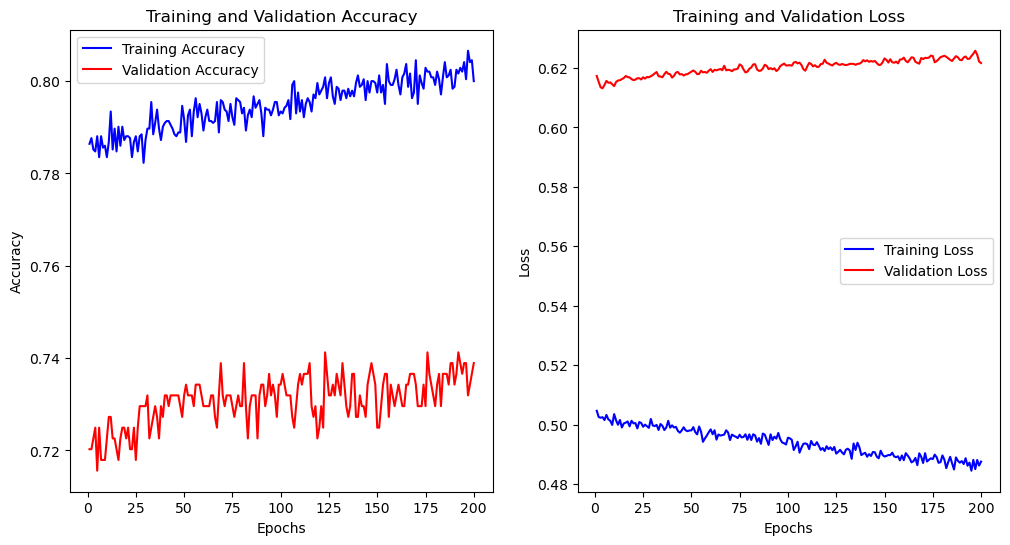

In [102]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ = range(1,len(acc)+1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_, acc, 'b-', label='Training Accuracy')
plt.plot(epochs_, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_, loss, 'b-', label='Training Loss')
plt.plot(epochs_, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], 'r', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [ ]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 使用相同的 history 對象
plot_accuracy(history)

In [ ]:
test=pd.read_excel("01test.xlsx")

feature_ex = ['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
test_data = test[feature_ex].to_numpy()

test_data=data_normalized(test_data)
test_data=data_standardized(test_data)
test_data=data_normalized(test_data)
test_data=data_standardized(test_data)

pca=PCA(n_components=6)
test_data_pca=pca.fit(test_data).transform(test_data)
test_data=test_data_pca
print(test_data)

In [ ]:
predicted_ans = model.predict(test_data)
print(np.mean(predicted_ans))
predicted_classes = (predicted_ans > 0.5).astype(int)


print(predicted_classes .shape)

if predicted_classes .ndim > 1:
    predicted_classes  = predicted_classes .squeeze()
print(predicted_classes .shape)

In [ ]:
my_submission = pd.DataFrame({'id': test.id, 'Underclocking': predicted_classes })
my_submission.to_csv('submision_67_7472.csv', index=False)

In [ ]:
#model-cross 
def create_model(input_dim):
    l2_regularizer = tf.keras.regularizers.l2(0.001)
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_features,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),   
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



from sklearn.model_selection import cross_validate, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = []
input_dim = x_data.shape[1]  # 获取输入特征的数量

for train_index, test_index in kf.split(x_data):
    # 分割数据
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    # 创建模型
    model = create_model(input_dim)
    
    # 训练模型
    model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)
    
    # 评估模型
    score = model.evaluate(x_test, y_test, verbose=0)
    scores.append(score[1])  # 假设我们关心的是准确率

# 打印每折的准确率以及平均准确率
print("每折的准确率:", scores)
print("平均准确率:", np.mean(scores))

In [ ]:
from tensorflow.keras.regularizers import l2
def build_model(n_layers, input_dim, regularization_rate=0.01, dropout_rate=0.001):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(regularization_rate)))
    for _ in range(n_layers - 1):
        model.add(Dense(64 // _ if 64 // _ > 4 else 4, activation='relu', kernel_regularizer=l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [ ]:
def evaluate_model(model, x_train, y_train, x_test, y_test, epochs=50):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    return history


In [ ]:
input_dim = x_data.shape[1]  # 假設x_data已經定義並準備好了
regularization_rate = 0.01
dropout_rate = 0.001
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

max_layers = 20  # 嘗試的最大層數
results = {}

for n_layers in range(1, max_layers + 1):
    model = build_model(n_layers, input_dim, regularization_rate, dropout_rate)
    history = evaluate_model(model, x_train, y_train, x_test, y_test)
    accuracy = np.max(history.history['val_accuracy'])  # 取最好的驗證準確率
    results[n_layers] = accuracy
    print(f"Tested {n_layers} layers: Validation Accuracy = {accuracy:.4f}")

# 找到最佳層數
best_layers = max(results, key=results.get)
print(f"Best number of layers: {best_layers} with Accuracy: {results[best_layers]:.4f}")
